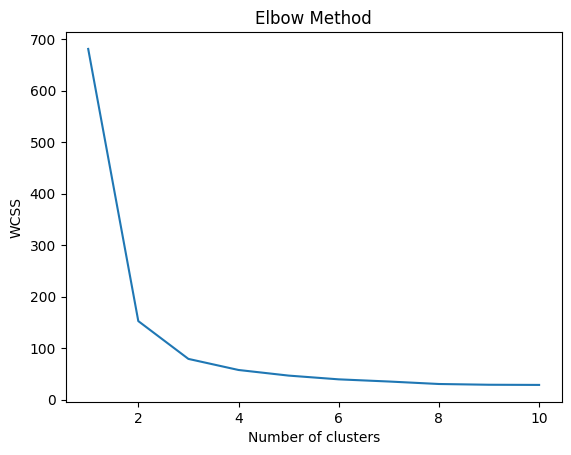

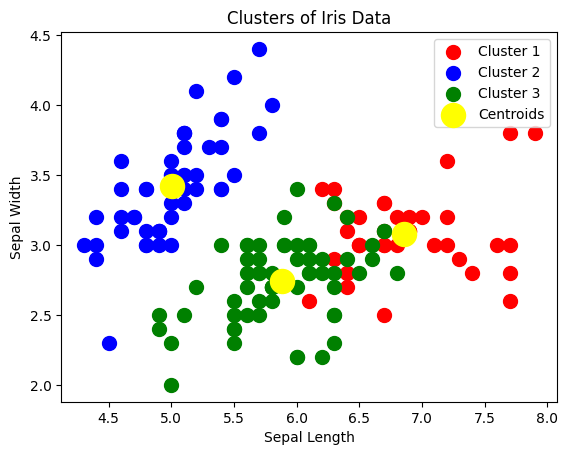

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Loading the dataset
df = pd.read_csv("/content/Iris.csv")  # Update the path if necessary

# Drop unnecessary columns
X = df.drop(columns=['Id', 'Species'])

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-means to the dataset with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Iris Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()



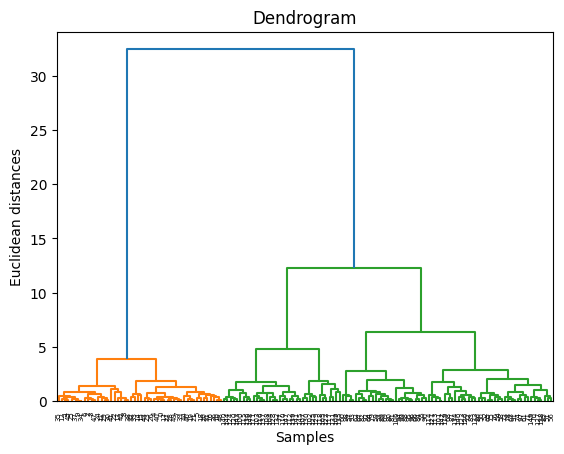

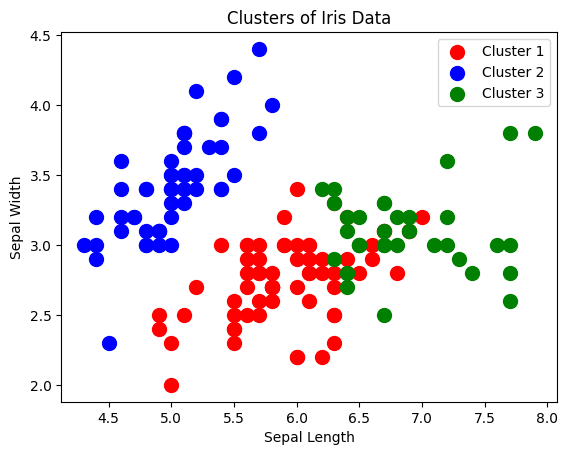

In [ ]:
# Importing libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Using Dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting Hierarchical Clustering to the dataset
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Visualizing the clusters
plt.scatter(X.values[y_hc == 0, 0], X.values[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.values[y_hc == 1, 0], X.values[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.values[y_hc == 2, 0], X.values[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters of Iris Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
